# Page Rank

In [89]:
import numpy as np
import sympy as sp
from scipy.sparse import dok_matrix
from numpy import linalg as la

#PAGERANK Problem 1

def AMAT(name, N):
    with open(name, 'r') as myfile:
        nodes = []
        for line in myfile.readlines()[1:]:
            for node in line.strip().split():
                nodes.append(node)
    m = int(len(nodes)/2)

    nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
    print("nodescopy",nodescopy)
    adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
    print("adj",adj)
    A = dok_matrix((N,N))
    for row in adj:
        i = nodescopy.index(row[0])
        j = nodescopy.index(row[1])
        A[i,j] = A[i,j] + 1
        
    return A

 
A = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
          [ 1,  0,  0,  0,  0,  0,  0,  0],
          [ 0,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  0,  1,  0,  0,  0,  1,  0],
          [ 1,  0,  0,  0,  0,  1,  1,  0],
          [ 1,  0,  0,  0,  0,  0,  1,  0],
          [ 1,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  0,  0,  0,  0,  0,  0,  0]])
print(AMAT("matrix.txt", 8) == A)

nodescopy ['0', '1', '2', '3', '4', '5', '6', '7']
adj [['0' '7']
 ['1' '0']
 ['3' '0']
 ['3' '2']
 ['3' '6']
 ['4' '0']
 ['4' '5']
 ['4' '6']
 ['5' '0']
 ['5' '6']
 ['6' '0']
 ['7' '0']]
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [90]:
#PAGERANK Problem 2
#Note that a node is a sink if its row sum in the adjacency matrix is equal to 0

def KMAT(A):
    A = np.asarray(A)

    sink = np.where(~A.any(axis = 1))
    Am = np.copy(A)
   
    for rowindex in sink:
        Am[rowindex] = np.repeat(1, len(A))
    
    rowsum = np.sum(Am, axis = 1)
    D = rowsum
    K = (Am.T / D)
    
    
    return K

print(KMAT(A))
 

[[ 0.          1.          0.125       0.33333333  0.33333333  0.5         1.
   1.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333333  0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.33333333  0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333333  0.33333333  0.5         0.
   0.        ]
 [ 1.          0.          0.125       0.          0.          0.          0.
   0.        ]]


In [91]:
#PAGERANK Problem 3
def steadystate(A, N = None, d = 0.85):
    K = KMAT(A)
    A = np.asarray(A)
    I = np.eye(N)
    p = np.random.choice(5, N)
    p = [float(i)/sum(p) for i in p]
    
    diff = 5
    eps = 1e-10
    
    while diff > eps:
        pold = np.copy(p)
        p = d * K @ p + ((1-d) / N) * np.ones(N)
        diff = (np.absolute(pold - p)).max()
        
    return p

print(steadystate(A, 8))

[ 0.43869288  0.02171029  0.02786154  0.02171029  0.02171029  0.02786154
  0.04585394  0.39459924]


In [92]:
#PAGERANK Problem 4

def dominant(A,N,tol):
    m = A.shape[0]
    n = A.shape[1]
    x = np.random.random((n,1))
    x = x/la.norm(x)
    diff = 1
    k = 0
    while ((diff > tol) & (k < N)):
        xnew = (A @ x)
        xnew = xnew/la.norm(xnew)
        diff = la.norm(xnew - x)
        x = xnew.copy()
        del(xnew)
        k = k + 1

    return x.T @ A @ x, x



def steadystate_eig(A, N = None, d = 0.85):
    K = KMAT(A)
    E = np.ones(N)
    B = d * K + ((1 - d)/N) * E
    p = dominant(B, 1000, 1e-5)[1]
    sump = sum(p)
    p = p/sump
    return p

print(steadystate_eig(A, 8))

[[ 0.43869457]
 [ 0.02171029]
 [ 0.02786154]
 [ 0.02171029]
 [ 0.02171029]
 [ 0.02786154]
 [ 0.04585394]
 [ 0.39459755]]


In [93]:
#PAGERANK Problem 5

def AMAT1(name):
    
    with open(name, 'r') as myfile:
        nodes = []
        for line in myfile.readlines()[1:]:
            for node in line.split(","):
                nodes.append(node)
    
    m = int(len(nodes)/2)
    nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
    adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
    A = np.zeros((len(nodescopy),len(nodescopy)))
    for row in adj:
        i = nodescopy.index(row[0])
        j = nodescopy.index(row[1])
        A[j,i] = 1
    
    ranks = steadystate(A, len(nodescopy), d = 0.7).reshape(len(nodescopy),1)
    nodescopy = np.asarray(nodescopy).reshape(len(nodescopy),1)
    rankmat = np.hstack((nodescopy,ranks))
    rankmat = rankmat[rankmat[:,1].argsort()[::-1]]
    print(rankmat)
    return rankmat

amat = AMAT1("ncaa2013.csv")

[['Duke' '0.009656735782493077']
 ['Butler' '0.008535400729543017']
 ['Louisville' '0.008494955682030719']
 ['Illinois' '0.008332028412173818']
 ['Indiana' '0.008221514638637541']
 ['Miami FL' '0.00814668377659458']
 ['Syracuse' '0.00789188211102955']
 ['Ohio St' '0.007775237826327088']
 ['Michigan St' '0.007618919181072098']
 ['Kansas' '0.007583806473329538']
 ['Minnesota' '0.007511047931821575']
 ['Michigan' '0.007397245584150507']
 ['Georgetown' '0.00739006708180595']
 ['Wisconsin' '0.00687748442602707']
 ['St Louis' '0.006749911054239554']
 ['New Mexico' '0.006671311196418934']
 ['Virginia' '0.006671146749132959']
 ['Marquette' '0.00656021793956054']
 ['Notre Dame' '0.006555148976244562']
 ['NC State' '0.006545229591433438']
 ['VA Commonwealth' '0.00639280128718036']
 ['Oklahoma St' '0.006344746547622161']
 ['Florida' '0.006337529664061449']
 ['Villanova' '0.006324925469192482']
 ['Temple' '0.006305157179583237']
 ['Arizona' '0.006106811224327509']
 ['UNLV' '0.006062641088320836']


# Conditioning

In [94]:
#CONDITIONING Problem 1
from scipy import linalg as la
A = np.array([[1,2],[3,4]])
def condition(A):
    sv = la.svdvals(A)
    svmax = max(sv)
    svmin = min(sv)
    if svmin == 0:
        return np.inf
    else:
        K = svmax / svmin
    return K

print("MY ANSWER: ", condition(A))
print("NUMPY'S ANSWER: ", np.linalg.cond(A))

orth = np.array([[1,0],[0,1]])
sing = np.array([[1,0],[0,0]])
print("Orthonormal matrix's condition: ", condition(orth))
print("Singular matrix's condition: ", condition(sing))



MY ANSWER:  14.9330343737
NUMPY'S ANSWER:  14.9330343737
Orthonormal matrix's condition:  1.0
Singular matrix's condition:  inf


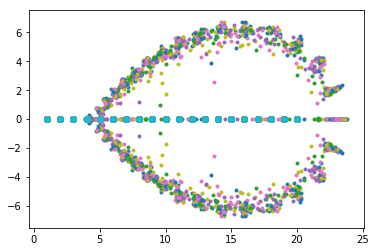

3.59199349772968e+25


In [95]:
#CONDITIONING Problem 2
from matplotlib import pyplot as plt
import sympy as sy

def wilkinson():
    for j in range(100):
        w_roots = np.arange(1,21)
        x,  i = sy.symbols('x i')
        w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
        
        w_coeffs = np.array(w.all_coeffs())
        new_coeffs = np.copy(w_coeffs)
        
        for i in range(len(new_coeffs)):
            new_coeffs[i] = new_coeffs[i] * np.random.normal(1, 10e-10)
            
        h = np.zeros(21)
        h[1]=1e-7

        new_roots = np.roots(new_coeffs)
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)

        plt.scatter(new_roots.real, new_roots.imag, marker = '.')
        plt.scatter(w_roots.real, w_roots.imag)

    plt.show()
    return k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
    
print(wilkinson())
    
    

In [96]:
#CONDITIONING Problem 3

def condition_est(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    Abar = A + H
    evalues_A = la.eigvals(A)
    evalues_Abar = la.eigvals(Abar)
    K_hat = la.norm(evalues_A - evalues_Abar)/la.norm(H)
    K = la.norm(A)*K_hat/la.norm(evalues_A)
    return K_hat, K

print(condition_est(A))


(0.87707545084808725, 0.89206927971278394)


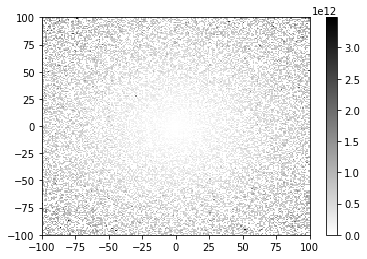

In [97]:
#CONDIITIONING Problem 4
def getmat(x,y):
    A = np.array([[1,x],[y,1]])
    return A

def resolution(xmin, xmax, ymin, ymax, res):
    
    xvec = np.linspace(xmin, xmax, res)
    yvec = np.linspace(ymin, ymax, res)
    zvec = np.zeros((res, res))
    
    for i in range(res): #loop over xvec
        for j in range(res): #loop over yvec
            A = getmat(xvec[i], yvec[j])
            zvec[i,j] = condition_est(A)[1]
    
    plt.pcolormesh(xvec,yvec,zvec, cmap = 'gray_r')
    plt.colorbar()
    plt.show()
        
resolution(-100,100,-100,100,200)

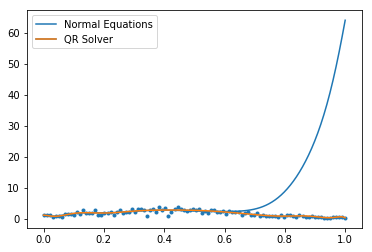

Normal Equations 
 [ -7.66616491e+04   1.48146119e+05   2.47646334e+05  -7.23672014e+05
  -1.39533785e+05   2.01096280e+06  -2.71905138e+06   1.74399461e+06
  -5.49052946e+05   3.52181893e+04   3.07342783e+04  -9.76671206e+03
   1.14167987e+03  -4.28343696e+01   1.27155211e+00]
QR Decomposition 
 [ -9.45621067e+06   6.62579037e+07  -2.08103552e+08   3.86657583e+08
  -4.72212316e+08   3.98175538e+08  -2.36823643e+08   9.96324432e+07
  -2.92403232e+07   5.78803296e+06  -7.24564873e+05   5.05308373e+04
  -1.42447803e+03   1.40662429e+00   1.15251488e+00]
Normal Equations Error:  152.14373083716285
QR Decomposition Error:  4.568370945324403


In [98]:
#CONDIITIONING Problem 5

def coef(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)    
    xhat = la.inv(A.T @ A) @ A.T @ yk
    
    Q, R = la.qr(A, mode = "economic")
    xhat_qr = la.solve_triangular(R, (Q.T) @ yk)
    
    yhat = np.polyval(xhat, xk)
    yhat_qr = np.polyval(xhat_qr,xk)
    
    plt.scatter(xk,yk, marker = ".")
    p1a, = plt.plot(xk,yhat)
    p1b, = plt.plot(xk,yhat_qr)
    plt.legend([p1a, (p1a,p1b)],["Normal Equations", "QR Solver"])
    plt.show()
    
    error = la.norm(yhat - yk)
    error_qr = la.norm(yhat_qr - yk)
    
    print("Normal Equations",  '\n', xhat)
    print("QR Decomposition",  '\n', xhat_qr)
    print("Normal Equations Error: ", error)
    print("QR Decomposition Error: ", error_qr)

    return

coef(14)

In [99]:
#CONDITIONING Problem 6

def problem6():
    x = sy.symbols("x")
    n = sy.symbols("n")
    
    ans_int_vec = np.zeros((10,1))
    ans_fac_vec = np.zeros((10,1))
    error_fac_vec = np.zeros((10,1))
    
    for n in range(5, 55, 5):
        ans_int = sy.integrate((x**(n))*sy.exp((x-1)), (x,0,1))
        i = int(n/5) - 1
        ans_int_vec[i] = ans_int
                        
    print("ANS_INTEGRATE_VEC: ", '\n', ans_int_vec)
    
    for n in range(5, 55, 5):
        ans_fac = float(((-1)**(n))*sy.subfactorial(n) + ((-1)**(n+1))*sy.factorial(n)/sy.exp(1))
        i = int(n/5) - 1
        ans_fac_vec[i] = ans_fac
        error_fac_vec[i] = float(la.norm(ans_int_vec[i] - ans_fac_vec[i])/la.norm(ans_int_vec[i]))
    
    print("ANS_FACTORIAL_VEC: ", '\n',ans_fac_vec)
    print("ERROR_FACTORIAL_VEC: ", '\n',error_fac_vec)
    
    plt.yscale('log')

    return

problem6()
    

ANS_INTEGRATE_VEC:  
 [[ 0.14553294]
 [ 0.08387707]
 [ 0.05901754]
 [ 0.04554488]
 [ 0.03708621]
 [ 0.03127967]
 [ 0.02704629]
 [ 0.02382273]
 [ 0.02128604]
 [ 0.01923775]]
ANS_FACTORIAL_VEC:  
 [[ 0.14553294]
 [ 0.08387707]
 [ 0.05901754]
 [ 0.04554488]
 [ 0.03708621]
 [ 0.03127967]
 [ 0.02704629]
 [ 0.02382273]
 [ 0.02128604]
 [ 0.01923775]]
ERROR_FACTORIAL_VEC:  
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


# Differentiation

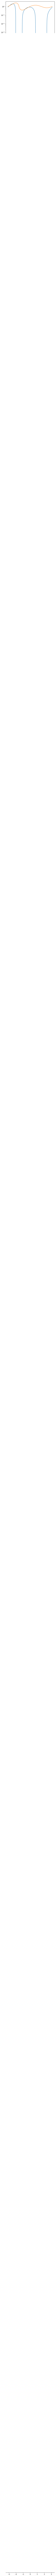

In [100]:
#DIFFERENTIATION Problem 1

import sympy as sy
from matplotlib import pyplot as plt

def f(x):
    return (np.sin(x) + 1)**(np.sin(np.cos(x)))

def derivative(xvec):
    x = sy.symbols("x")
    func = sy.lambdify(x, sy.diff((sy.sin(x) + 1)**(sy.sin(sy.cos(x)))),'numpy') # returns a numpy-ready function
    fvec = np.vectorize(f)
    yvec = fvec(xvec)
    yvecprime = func(xvec)
    return yvec, yvecprime

xvec = np.linspace(-np.pi, np.pi, 1000)
yvec, yvecprime = derivative(xvec)
plt.plot(xvec, yvecprime)
plt.plot(xvec, yvec)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot
plt.show()

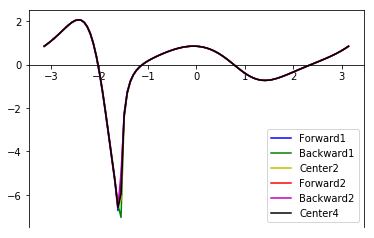

In [101]:
#DIFFERENTIATION Problem 2
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt


h = sy.symbols('h')
x = sy.symbols("x")


def f(x):
    return (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    
def forward1(g, points, h):

    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points)
    derive = (fpoints1 - fpoints2) / h
    
    return derive

def forward2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points)
    fpoints2 = function(points+h)
    fpoints3 = function(points+ 2*h)
    derive = (-3*fpoints1 + 4*fpoints2 - fpoints3) / (2*h)
    
    return derive

def backward1(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points - h)
    fpoints2 = function(points)
    derive = (fpoints2 - fpoints1) / h
    
    return derive

def backward2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points)
    fpoints2 = function(points - h)
    fpoints3 = function(points - 2*h)
    derive = (3*fpoints1 - 4*fpoints2 + fpoints3) / (2*h)
    
    return derive

    
def center2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points - h)
    derive = (fpoints1 - fpoints2) / (2 * h)
    
    return derive

def center4(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points - 2*h)
    fpoints2 = function(points - h)
    fpoints3 = function(points + h)
    fpoints4 = function(points + 2*h)
    derive = (fpoints1 - 8*fpoints2 + 8*fpoints3 -fpoints4) / (12 * h)
    
    return derive

points = np.linspace( -np.pi, np.pi, 100)

derivef1 = forward1(f, points, 0.01)
deriveb1 = backward1(f, points, 0.01)
derivec2 = center2(f, points, 0.01)
derivef2 = forward2(f, points, 0.01)
deriveb2 = backward2(f, points, 0.01)
derivec4 = center4(f, points, 0.01)

plt.plot(points, derivef1, 'b', label = 'Forward1')
plt.plot(points, deriveb1, 'g', label = 'Backward1')
plt.plot(points, derivec2, 'y', label = 'Center2')
plt.plot(points, derivef2, 'r', label = 'Forward2')
plt.plot(points, deriveb2, 'm', label = 'Backward2')
plt.plot(points, derivec4, 'k', label = 'Center4')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.show()

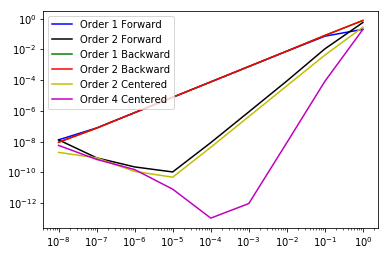

In [102]:
#DIFFERENTIATION Problem 3
x = sy.symbols("x")

def problem3(x):
    hvec = np.logspace(-8,0,9)
    xvec = np.repeat(x,9)
    exact = derivative(xvec)[1]
    errf1 = abs(forward1(f,xvec,hvec)-exact)
    errf2 = abs(forward2(f,xvec,hvec)-exact)
    errb1 = abs(backward1(f,xvec,hvec)-exact)
    errb2 = abs(backward1(f,xvec,hvec)-exact)
    errc2 = abs(center2(f,xvec,hvec)-exact)
    errc4 = abs(center4(f,xvec,hvec)-exact)
    plt.plot(hvec,errf1, 'b', label = 'Order 1 Forward')
    plt.plot(hvec,errf2, 'k', label = 'Order 2 Forward')
    plt.plot(hvec,errb1, 'g', label = 'Order 1 Backward')
    plt.plot(hvec,errb2, 'r', label = 'Order 2 Backward')
    plt.plot(hvec,errc2, 'y', label = 'Order 2 Centered')
    plt.plot(hvec,errc4, 'm', label = 'Order 4 Centered')
    plt.legend(loc = 'upper left')
    plt.loglog()
    plt.show()

    
problem3(1)

In [103]:
def forward(f,alpha,beta,h):
    return (f(alpha+h, beta+h)-f(alpha, beta))/h
def backward(f,alpha,beta,h):
    return (f(alpha, beta)-f(alpha-h, beta-h))/h
def centered(f,alpha,beta,h):
    return (f(alpha+h, beta+h)-f(alpha-h, beta-h))/(2*h)

def xfunc(alpha, beta):
    return alpha*np.tan(beta)/(np.tan(beta)-np.tan(alpha))

def yfunc(alpha, beta):
    return alpha*np.tan(beta)*np.tan(alpha)/(np.tan(beta)-np.tan(alpha))

def problem4():
    plane = np.load("plane.npy")
    print(plane)
    m = len(plane)
    alpha = plane[:,1]
    beta = plane[:,2]
    alpha = np.deg2rad(alpha)
    beta = np.deg2rad(beta)
    xvec = np.zeros((m,1))
    yvec = np.zeros((m,1))
    h = 0.00001
    xvec[0] = forward(xfunc, alpha[0], beta[0], h)
    yvec[0] = forward(yfunc, alpha[0], beta[0], h)

    for i in range(1,m-1):
        xvec[i] = centered(xfunc, alpha[i], beta[i], h)
        yvec[i] = centered(xfunc, alpha[i], beta[i], h)
    
    xvec[m-1] = backward(xfunc, alpha[m-1], beta[m-1], h)
    yvec[m-1] = backward(yfunc, alpha[m-1], beta[m-1], h)

    speed = np.zeros((m,1))
    for i in range(m):
        speed[i] = np.sqrt((xvec[i]**2) + (yvec[i]**2))
        
    return speed

problem4()


[[  7.    56.25  67.54]
 [  8.    55.53  66.57]
 [  9.    54.8   65.59]
 [ 10.    54.06  64.59]
 [ 11.    53.34  63.62]
 [ 12.    52.69  62.74]
 [ 13.    51.94  61.72]
 [ 14.    51.28  60.82]]


array([[ 8.09424127],
       [ 0.03165647],
       [ 0.31016449],
       [ 0.60187847],
       [ 0.89408327],
       [ 1.16632658],
       [ 1.49116613],
       [ 9.20069756]])

In [104]:
#DIFFERENTIATION Problem 5

xyvec = np.array([4,2])

def ftest(xyvec):
    z = np.array([xyvec[0]**2, (xyvec[0]**3) - xyvec[1]])
    return z.T

print(ftest(xyvec))

def jacobian(f, xyvec, h):
    m = len(f(xyvec))
    n = len(xyvec)
    I = np.eye(n)
    jacob = np.zeros((m,n))
    
    for j in range(m):
        I2 = I[:,j]
        sum1 = xyvec + h*I2
        sum2 = xyvec - h*I2
        jacob[:,j] = (f(sum1) - f(sum2))/(2*h)            
        
    return jacob

jacobian(ftest, xyvec, 0.0001)



[16 62]


array([[  8.        ,   0.        ],
       [ 48.00000001,  -1.        ]])

In [105]:
#DIFFERENTIATION Problem 6
import numpy as np
import sympy as sy
from autograd import grad
import autograd.numpy as anp 
from autograd import multigrad
import time

x = sy.symbols("x")

def h(x):
    return sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))

def center2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points - h)
    derive = (fpoints1 - fpoints2) / (2 * h)
    
    return derive

def problem6():
    a = sy.diff(h(x),x)
    b = sy.lambdify(x,a)
    start_time = time.clock()
    c = b(sy.pi/4)
    c_time = time.clock() - start_time
    
    start_time = time.clock()
    g = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
    
    start_time = time.clock()
    grad_g = grad(g)
    d = grad_g(np.pi/4)
    d_time = time.clock() - start_time
    
    start_time = time.clock()
    e = center2(h, np.pi/4, 1e-5)
    e_time = time.clock() - start_time

    print("Sympy time: ", c_time, "Sympy error: ", 0)
    print("Second Center time: ", e_time,"Second Center error: ", abs(e - c))
    print("Autograd time: ", d_time, "Sympy error: ", abs(d -c ))
    
    return c, d, e

problem6()

Sympy time:  0.0007120000000000459 Sympy error:  0
Second Center time:  0.004273000000004856 Second Center error:  1.38440092723e-11
Autograd time:  0.00029899999999827287 Sympy error:  5.55111512313e-17


(0.2302590111469609, 0.23025901114696085, 0.23025901116080491)

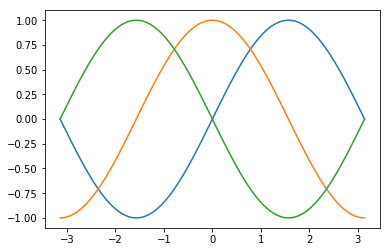

In [106]:
#DIFFERENTIATION Problem 7
from matplotlib import pyplot as plt

def taylor_exp(x, tol= 0.0001):
    result = 0
    cur_term = x
    i = 1
    j = 0
    
    while (anp.abs(cur_term) >= tol):
        cur_term = ((-1)**j)*(x**i)/np.math.factorial(i)
        result += cur_term
        j += 1
        i += 2
        
    return result

def problem7():
    sin_taylor_exp_1 = grad(taylor_exp)
    sin_taylor_exp_2 = grad(grad(taylor_exp))
    xvec = anp.linspace(-anp.pi, anp.pi, 100)
    yvec0 = anp.zeros((len(xvec),1))
    yvec1 = anp.zeros((len(xvec),1))
    yvec2 = anp.zeros((len(xvec),1))
    for i in range(len(xvec)):
        yvec1[i] = sin_taylor_exp_1(xvec[i])
        yvec2[i] = sin_taylor_exp_2(xvec[i])
        yvec0[i] = taylor_exp(xvec[i])
    plt.plot(xvec, yvec0)
    plt.plot(xvec, yvec1)
    plt.plot(xvec, yvec2)
    plt.show()
    return

problem7()

In [115]:
#DIFFERENTIATION Problem 8
from autograd import elementwise_grad
from autograd import jacobian


def problem8():
    k = lambda q : anp.array([anp.exp(q[0])+(q[1]**3), 3*q[1] - anp.cos(q[0])])
    jacobian_k = jacobian(k)
    start_time = time.clock()   
    
    jacob_auto = jacobian_k(anp.array([1.,1.]))
    auto_time = time.clock() - start_time
   
    x = sy.symbols("x")
    z = sy.symbols("z")
    
    function = sy.lambdify(x, g(x), "numpy")
    symat = sy.Matrix([sy.exp(x)*sy.sin(z) + z**3, 3*z - sy.cos(x)])
    jacob_sy = symat.jacobian([x,z]).subs([(x,1),(z,1)])
    
    

    return jacob_auto, jacob_sy

problem8()

(array([[ 2.71828183,  3.        ],
        [ 0.84147098,  3.        ]]), Matrix([
 [E*sin(1), E*cos(1) + 3],
 [  sin(1),            3]]))

# Integration

In [142]:
#INTEGRATION Problem 1
def integrate1(g, a, b, N, method):
    ans = 0
    if method == "midpoint":
        for i in range(N):
            x = a + ((2*i + 1)*(b-a))/(2*N)
            ans = ans + g(x)
        ans = (b-a)/N * ans
        
    if method == "trapezoid":
        for i in range(1,N):
            x = a + i*(b-a)/N
            ans = ans + g(x)
        x0 = a
        xn = b
        ans = (b-a)/(2*N) * (g(x0) + 2*ans + g(xn))

    if method == "Simpsons":
        odd = 0
        even = 0
        for i in range(1, 2*N):
            if ((i == 1) | (i%2 == 1)) & (i < 2*N):
                x = a + i*(b-a)/(2*N)
                odd = odd + g(x)
            if (i%2 == 0) & (i < 2*N - 1):
                x = a + i*(b-a)/(2*N)
                even = even + g(x)
        x0 = a 
        x2n = b
        ans = (b-a)/(6*N)*(g(x0) + 4*odd + 2*even + g(x2n))
    
    return ans

def g(x):
    return 0.1*(x**4) - 1.5*(x**3) + 0.53*(x**2) + 2*x + 1

integrate1(g, -10, 10, 100, method = "Simpsons")
    

4373.33336

In [ ]:
def f8(x,y):
    z = sy.zeros((2,1))
    z[0] = (sy.exp(x))*sy.sin(y) + y**3
    z[1] = 3*y - sy.cos(x)
    return z




In [119]:
#INTEGRATION Problem 2
from scipy.stats import norm

def newtoncotes(mu, sigma, N, k):
    z = np.linspace(mu - k*sigma, mu + k*sigma, N)
    w = np.zeros((N,1))

    for i in range(1,N-1):
        zmin = (z[i-1] + z[i])/2
        zmax = (z[i] + z[i+1])/2
        w[i] = norm.cdf(zmax,loc = mu, scale = sigma) - norm.cdf(zmin,loc = mu, scale = sigma)
        
    w[0] = norm.cdf((z[0]+z[1])/2,loc = mu, scale = sigma)
    w[N-1] = 1 - norm.cdf((z[N-2]+z[N-1])/2,loc = mu, scale = sigma)
    
    return z,w

newtoncotes(0,1,11,4)
    

(array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 array([[  1.59108590e-04],
        [  2.39602174e-03],
        [  2.01950016e-02],
        [  9.23195383e-02],
        [  2.29508588e-01],
        [  3.10843483e-01],
        [  2.29508588e-01],
        [  9.23195383e-02],
        [  2.01950016e-02],
        [  2.39602174e-03],
        [  1.59108590e-04]]))

In [124]:
#INTEGRATION Problem 3
def lognormal(mu, sigma, N, k):
    z = newtoncotes(mu, sigma, N, k)[0]
    A = np.exp(z)
    z = np.log(A)
    w = np.zeros((N,1))

    for i in range(1,N-1):
        zmin = (z[i-1] + z[i])/2
        zmax = (z[i] + z[i+1])/2
        w[i] = norm.cdf(zmax,loc = mu, scale = sigma) - norm.cdf(zmin,loc = mu, scale = sigma)

    w[0] = norm.cdf((z[0]+z[1])/2,loc = mu, scale = sigma)
    w[N-1] = 1 - norm.cdf((z[N-2]+z[N-1])/2,loc = mu, scale = sigma)
    
    return z,w

lognormal(0,1,11,4)

(array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 array([[  1.59108590e-04],
        [  2.39602174e-03],
        [  2.01950016e-02],
        [  9.23195383e-02],
        [  2.29508588e-01],
        [  3.10843483e-01],
        [  2.29508588e-01],
        [  9.23195383e-02],
        [  2.01950016e-02],
        [  2.39602174e-03],
        [  1.59108590e-04]]))

In [137]:
#INTEGRATION Problem 4
def expectedincome(mu, sigma, N, k):
    z, w = lognormal(mu, sigma, N, k)
    z = np.exp(z)
    return np.dot(z,w)

print("My Approximation: ", expectedincome(mu = 10.5, sigma = 0.8, N = 1000, k = 4))
print("Exact Value: ", np.exp(10.5 + (0.8**2)/2))
    

My Approximation:  [ 50005.03168291]
Exact Value:  50011.0870085


In [139]:
#INTEGRATION Problem 5
x1 = 0
x2 = np.sqrt(3/5*1.0)
x3 = -np.sqrt(3/5*1.0)
w1 = 8/9*1.0
w2 = 5/9*1.0
w3 = 5/9*1.0

def g(x):
    return 0.1*(x**4) - 1.5*(x**3) + 0.53*(x**2) + 2*x + 1

def gaussquad(g,a,b):
    return (b-a)/2 * ((w1*g((b-a)/2*x1 + (a+b)/2)) + (w2*g((b-a)/2*x2 + (a+b)/2) + (a+b)/2) + (w3*g((b-a)/2*x3 + (a+b)/2)))

print("Gaussian Quadrature: ", gaussquad(g,-10,10))

4373.33333333


In [144]:
#INTEGRATION Problem 6
from scipy import integrate
print(integrate.quad(g, -10,10)[0])

4373.333333333334


In [162]:
#INTEGRATION Problem 7
#let omega be a 1x2 array [a,b]
def g1(x1,y1):
    if ((x1**2) + (y1**2) <= 1):
        return 1
    else:
        return 0

omega = np.array([-1,1])
def montecarlo(g, omega, N):
    a = omega[0]
    b = omega[1]
    
    xy = np.random.rand(N,2)*(b-a) - 1
    summed = 0
    for i in range(N):
        summed = summed + g(xy[i,0], xy[i,1])
        
    pi = (4/N)*summed
    
    return pi

n = 1000
delta = 5
while (delta != 0):
    estimate = montecarlo(g1, omega, n)
    delta = round(estimate, 5) - 3.1415
    n = n + 1
print(estimate)
print("Smallest number of draws: ", n)

3.141502370851011
Smallest number of draws:  4008


In [14]:
#INTEGRATION Problem 8

def prime(i, primes):
    for prime in primes:
        if not (i == prime or i % prime):
            return False
    primes.add(i)
    return i

def primegen(n):
    primes = set([2])
    i, p = 2, 0
    while True:
        if prime(i, primes):
            p += 1
            if p == n:
                return np.array(list(primes))
        i += 1

print(primegen(4))
def nthelement(name, N, d):
    primes = primegen(d)
    if name == "Weyl":
        weyl = np.zeros((d,1))
        for i in range(d):
            weyl[i] = N*(primes[i]**0.5)
        return weyl
    
    if name == "Haber":
        haber = np.zeros((d,1))
        for i in range(d):
            haber[i] = N*(N+1)/2*(primes[i]**0.5)
        return haber
    
    if name == "Niederreiter":
        niederreiter = np.zeros((d,1))
        for i in range(0,d):
            niederreiter[i] = N*(2**(i+1/(N+1)))
        return niederreiter
    
    if name == "Baker":
        baker = np.zeros((d,1))
        for i in range(d):
            baker[i] = N*np.exp(primes[i])
        return baker

nthelement("Weyl", 1000, 5)[1]

[2 3 5 7]


array([ 1732.05080757])

In [198]:
#INTEGRATION Problem 8

def prime(i, primes):
    for prime in primes:
        if not (i == prime or i % prime):
            return False
    primes.add(i)
    return i

def primegen(n):
    primes = set([2])
    i, p = 2, 0
    while True:
        if prime(i, primes):
            p += 1
            if p == n:
                return np.array(list(primes))
        i += 1

print(primegen(4))
def nthelement(name, N, d):
    primes = primegen(d)
    if name == "Weyl":
        weyl = N*(primes**0.5)
        weyl = weyl - np.floor(weyl)
        return weyl
    
    if name == "Haber":
        haber = N*(N+1)/2*(primes**0.5)
        haber = haber - np.floor(haber)
        return haber
    
    if name == "Niederreiter":
        niederreiter = np.zeros((d,1))
        for i in range(0,d):
            niederreiter[i] = N*(2**((i+1)/(N+1)))
        niederreiter = niederreiter - np.floor(niederreiter)
        return niederreiter
    
    if name == "Baker":
        baker = N*np.exp(primes)
        baker = baker - np.floor(baker)
        return baker

nthelement("Niederreiter", 5, 2) #5th array in niederreiter sequence

[2 3 5 7]


array([[ 0.61231024],
       [ 0.29960525]])

In [207]:
#INTEGRATION Problem 9
#let omega be a 1x2 array [a,b]
def g1(x1,y1):
    if ((x1**2) + (y1**2) <= 1):
        return 1
    else:
        return 0

omega = np.array([-1,1])
def piapprox(g, omega, name, n):
    a = omega[0]
    b = omega[1]
    delta = 5 
    summed = 0
    for i in range(n):
        xy = nthelement(name, i, 2)
        summed = summed + g(xy[0], xy[1])
    pi2 = (4/n)*summed
    
    return pi2

n = 1
delta = 5
while (delta != 0):
    estimate = piapprox(g, omega, "Weyl", n)
    delta = round(estimate, 5) - 3.1415
    n = n + 1
print(estimate)
print("Smallest number of draws: ", n)

3.1414982164090364
Smallest number of draws:  1683


# Line Search

In [15]:
import numpy as np
from scipy import linalg as la
from scipy import optimize
from scipy.misc import derivative
from matplotlib import pyplot as plt
import cmath
import math
from scipy.sparse import dok_matrix
import sympy as sy
from matplotlib import pyplot as plt
from autograd import grad
import autograd.numpy as anp
from autograd import jacobian

#LINE Problem 1

def L1(x):
    return np.exp(x) - 4*x

def golden(f, a, b, niter):
    rho = (1/2)*(3-np.sqrt(5))
    a = a + rho*(b-a)
    b = a + (1-rho)*(b-a)
    n = 0
    midpoint = (1/2)*(a + b)

    while (abs(b-a) > 0.001) & (n < niter):
        
        if f(a) >= f(b):
            a = a + rho*(b-a)
            midpoint = (1/2)*(a + b)
        elif f(a) <= f(b):
            b = a + (1-rho)*(b-a)
            midpoint = (1/2)*(a + b)
            
        n = n + 1
        
    return n, midpoint 

golden(L1, 0, 3, 1000)

(15, 1.3861587121128613)

In [16]:
#LINE Problem 2

def bisect(f, a, b, niter):
    x = (b+a)/2
    n = 0
    
    while(abs(b-a) > 0.001) & (n < niter):
        fprime = derivative(f, x)
        if fprime >= 0:
            b = x
        elif fprime <= 0:
            a = x
        x = (b+a)/2
        n = n + 1
        
    return n, x

bisect(L1, 0, 3, 1000)

(12, 1.2249755859375)

In [17]:
#LINE Problem 3

def L2(x):
    return (x**2) + np.sin(5*x)

def newton(fprime, fprimeprime, initial):
    xold = initial
    xnew = xold - fprime(xold)/fprimeprime(xold)
    n = 1
    diff = 5
    while(diff > 1e-5):
        xold = np.copy(xnew)
        xnew = xold - (fprime(xold)/fprimeprime(xold))
        diff = np.linalg.norm(xnew - xold)/np.linalg.norm(xold)
        n = n + 1
    return n, xnew

def L2prime(x):
    return 2*x + 5*np.cos(5*x)

def L2primeprime(x):
    return 2 - 25*np.sin(5*x)

newton(L2prime, L2primeprime, 0)



(48, -1.4473142236328096)

In [18]:
#LINE Problem 4

def L3(x):
    return (x**2) + np.sin(x) + np.sin(10*x)

def L3prime(x):
    return 2*x + np.cos(x) + 10*np.cos(10*x)

def secant(fprime, x1, x2):
    xold = x1
    xoldold = x2
    fppapprox = (fprime(xold) - fprime(xoldold))/(xold - xoldold)
    xnew = xold - fprime(xold)/fppapprox
    n = 1
    diff = 5
    while(diff > 1e-5):
        xoldold = np.copy(xold)
        xold = np.copy(xnew)
        fppapprox = (fprime(xold) - fprime(xoldold))/(xold - xoldold)
        xnew = xold - fprime(xold)/fppapprox
        diff = abs(xnew - xold)/abs(xold)
        n = n + 1
    return n, xnew

print(secant(L3prime, 0, -1))
print(secant(L3prime, -0.15, -0.2))
print(secant(L3prime, -0.15, -1))

(8, -0.77697898997149095)
(3, -0.16367722112811267)
(5, -0.1636772212262588)


In [19]:
#LINE Problem 5

def backtrack(f, jacob, x, p):
    alpha = 1
    c = 0.5
    rho = 0.5
    
    value = jacob(x).T @ p
    while (f(x + alpha*p) > f(x) + c*alpha*value):
        alpha = rho*alpha
    
    return alpha

from scipy.optimize import line_search

def objective(x):
    return x[0]**2 + 4*x[1]**2

def grad(x):
    return np.array([2*x[0], 8*x[1]])

x = np.array([1., 3.])
p = -grad(x)
a = line_search(objective, grad, x, p)[0]
print("MY ANSWER: ", backtrack(objective, grad, x, p))
print("NUMPY's ANSWER: ", a)

MY ANSWER:  0.125
NUMPY's ANSWER:  0.125649913345


# Newton's Method

In [20]:
#NEWTON Problem 1

f = lambda x : x**4 - 3
f_prime = lambda x : 4*x**3

def newtonprob1(f, f_prime, x0, N, tol = 1e-5):
    for i in range(N):
        print(i)
        x1 = x0 - (f(x0)/f_prime(x0))
        print(x1)
        if la.norm(x1 - x0) < tol:
            print("The Value =", x1)
            print("end")
            return x1
        else:
            x0 = x1

x1 = newtonprob1(f, f_prime, 1, 10000, 1e-5)
optimize.newton(f, 1)

print (np.allclose(x1, optimize.newton(f, 1)))

0
1.5
1
1.3472222222222223
2
1.3171376938034396
3
1.3160753007540056
4
1.3160740129543826
The Value = 1.3160740129543826
end
True


In [21]:
#NEWTON Problem 2
def newtonprob2(f, f_prime, x0, N, tol = 1e-5):
    for i in range(N):
        x1 = x0 - (f(x0)/jacobian_r_fn(x0)[0,0])
        if la.norm(x1 - x0) < tol:
            print("The Value =", x1)
            print("end")
            return x1
        else:
            x0 = x1
    return
            
N1 = 30
N2 = 20
P1 = 2000
P2 = 8000

r0 = anp.array([.11])
r_fn = lambda r : anp.array([P2*(1 - (1 + r[0])**(-N2)) - P1*((1+r[0])**N1 - 1)])
jacobian_r_fn = jacobian(r_fn)

print(newtonprob2(r_fn, jacobian_r_fn, r0, 10000, 1e-10))



The Value = [ 0.03877843]
end
[ 0.03877843]


In [22]:
#NEWTON Problem 3
f2 = lambda x : x**(1/3)
f2_prime = lambda x : (1/3) * x ** (-2/3)


f_modified = lambda x: np.sign(x) * np.power(np.abs(x), 1/3) 
f_modified_prime_plus = lambda x : np.cos(x) * np.power(np.abs(x), 1/3) \
                         + np.sign(x) * (1/3) * np.power(np.abs(x), -2/3)
f_modified_prime_minus = lambda x : np.cos(x) * np.power(np.abs(x), 1/3) \
                         - np.sign(x) * (1/3) * np.power(np.abs(x), -2/3)


f_2prime = lambda x : 12*x**2

def newtonprob3(f, f_modified_prime_plus, f_modified_prime_minus, x0, N, tol = 1e-5, alpha = 1):
    for i in range(N):
        if x0 >= 0:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_plus(x0))
        else:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_minus(x0))
        
        if abs(x1 - x0) < tol:
            print("Value: ", x1)
            print("End")
            return x1
        elif i == N - 1:
            return False
        else:
            x0 = x1
    
    return

print(newtonprob3(f2, f2_prime, f2_prime,  -1 ,10000, 1e-10, 0.1))
print(newtonprob3(f_modified, f_modified_prime_plus, f_modified_prime_minus, 0.01 ,10000, 1e-10, 1))
print(newtonprob3(f_modified, f_modified_prime_plus, f_modified_prime_minus, 0.01 ,10000, 1e-10, 0.4))

False
False
Value:  -6.51346510752e-12
End
-6.51346510752e-12


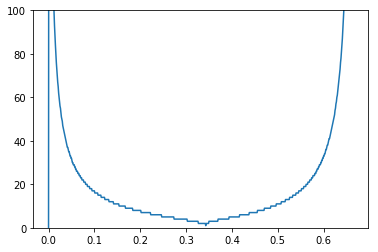

In [23]:
#NEWTON Problem 4
def newtonprob4(f_modified, f_modified_prime_plus, f_modified_prime_minus, x0, N, tol = 1e-5, alpha = 1):
    for i in range(N):
        if x0 >= 0:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_plus(x0))
        else:
            x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_minus(x0))
        
        if abs(x1 - x0) < tol:
            return x1, i
        elif i == N - 1:
            return False, np.inf
        else:
            x0 = x1
    
    return

def alpha_plot(f_modified, f_modified_prime_plus, f_modified_prime_minus):
    iteration = []
    alpha = []
    for i in range(1000):
        alpha.append(i/1000)
        x1, j = newtonprob4(f_modified, f_modified_prime_plus, f_modified_prime_minus, 0.01, 1000, 1e-5, alpha[i])
        iteration.append(j)
    return alpha, iteration
        
alpha, iteration = alpha_plot(f_modified, f_modified_prime_plus, f_modified_prime_minus)
plt.plot(alpha, iteration)
plt.ylim(0,100)
plt.show()

In [24]:
#NEWTON Problem 5
def newtonprob5(f_modified, f_modified_prime_plus, f_modified_prime_minus, x0, N, tol = 1e-5, alpha = 1):

    Df =  np.zeros((np.size(x0), np.size(x0)))
    for i in range(N):
        if np.isscalar(x0):
            if x0 >= 0:
                x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_plus(x0))
            else:
                x1 = x0 - alpha * (f_modified(x0)/f_modified_prime_minus(x0))
                
            if abs(x1 - x0) < tol:
                return x1
            elif i == N - 1:
                return False
            else:
                x0 = x1
              
        else:
            yk = la.solve(jacobian_f(x0), f_modified(x0))
            x1 = x0 - alpha * yk
            if la.norm(x1 - x0) < tol:
                return x1
            elif i == N - 1:
                return False
            else:
                x0 = x1
    return
  
x0 =  anp.array([-0.25, 0.0005005])              
f = lambda x: anp.array([x[0]**2, x[0]+x[1] - 2])
jacobian_f = jacobian(f)

print(newtonprob5(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 0.5))
print(newtonprob5(f_modified, f_modified_prime_plus, f_modified_prime_minus, 1, 10000, 1e-5, 0.5))

[-0.00001883  2.00001883]
-2.09894809985e-06


In [25]:
#NEWTON Problem 6
x0 =  anp.array([-0.25, 0.0005005])              
f = lambda x: anp.array( [5*x[0]*x[1] - x[0]*(1+x[1]), -1*x[0]*x[1] + (1-x[1])*(1+x[1]) ])
jacobian_f = jacobian(f)

print(newtonprob5(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 1))

x0 =  anp.array([-0.0000311, 0.0005005])              
f = lambda x: anp.array( [5*x[0]*x[1] - x[0]*(1+x[1]), -1*x[0]*x[1] + (1-x[1])*(1+x[1]) ])
jacobian_f = jacobian(f)

print(newtonprob5(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 1))

x0 =  anp.array([-0.04411, 0.24445])              
f = lambda x: anp.array( [5*x[0]*x[1] - x[0]*(1+x[1]), -1*x[0]*x[1] + (1-x[1])*(1+x[1]) ])
jacobian_f = jacobian(f)

print(newtonprob5(f, jacobian_f, jacobian_f, x0, 10000, 1e-5, 0.55))

[-0. -1.]
[-0.  1.]
[ 3.74999408  0.24999754]


Value:  [[-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5-0.8660254j -0.5-0.8660254j -0.5-0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 ..., 
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]
 [-0.5+0.8660254j -0.5+0.8660254j -0.5+0.8660254j ...,  1.0+0.j         1.0+0.j
   1.0+0.j       ]]
End


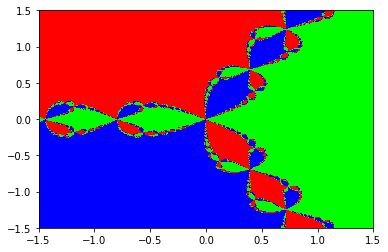

Value:  [[-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 ..., 
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]
 [-1.+0.j -1.+0.j -1.+0.j ...,  1.+0.j  1.+0.j  1.+0.j]]
End


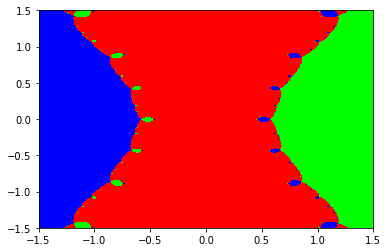

In [26]:
#NEWTON Problem 7
def newtonmesh(f, f_prime, x0, N, tol = 1e-5):
    for i in range(N):
        x1 = x0 - (f(x0)/f_prime(x0))
        if la.norm(x1 - x0) < tol:
            print("Value: ", x1)
            print("End")
            return x1
        else:
            x0 = x1
    return
           
def newtonprob7(f, Df, r_min, r_max, i_min, i_max, rec, iters, tol):
    x_real = np.linspace(r_min, r_max, rec) 
    x_imag = np.linspace(i_min, i_max, rec) 
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    

    X_1 = X_0 - f(X_0)/Df(X_0)

    result = newtonmesh(f, Df, X_0, iters, tol)
    result_round = np.round(result, 8) 
    y = np.unique(result_round)
    howmanyroots = len(y)
    
    Y = np.zeros((rec, rec))
    for j in range(rec):
        for k in range(rec):
            Y[j, k]  = np.where(y == result_round[j, k])[0]

    plt.pcolormesh(x_real, x_imag, Y, cmap="brg")
    plt.show()
    
f7 = lambda x: x**3 - 1
Df7 = lambda x: 3*x**2

newtonprob7(f7, Df7, -1.5, 1.5, -1.5, 1.5, 500, 10000, 1e-10)

f7_2 = lambda x: x**3 - x
Df7_2 = lambda x: 3*x**2 - 1

newtonprob7(f7_2, Df7_2, -1.5, 1.5, -1.5, 1.5, 500, 10000, 1e-10)

# Simplex

In [27]:
#SIMPLEX

class SimplexSolver(object):
    
    def __init__(self, c, A, b):
        self.c = c
        self.A = A
        self.b = b
        self.m, self.n = A.shape
        
        origin = np.zeros(A.shape[1])
        is_not_feasible = (A @ origin > b).all()
        
        if is_not_feasible:
            raise ValueError('Origin is not in range of A.')
        else:
            self.tracklist = list(range(self.n, self.m+self.n))
            self.tracklist += range(self.n)

        
    def make_tableau(self):
        A_bar = np.concatenate([A, np.identity(self.m)], axis=1)
        c_bar = np.concatenate([c, np.zeros(self.m)])

        tab1 = np.concatenate([np.array([0]), -1*c_bar, np.array([1])])
        tab2 = np.concatenate([b.reshape(self.m ,1), A_bar,
                               np.zeros((self.m, 1))], axis=1)

        self.tableau = np.concatenate([tab1.reshape(1, len(tab1)),
                                       tab2],
                                      axis=0)
    def blands_rule(self):
        # to determine the pivot column
        # find the first negativ element in the top row
        neg_values = np.where(self.tableau[0] < 0)
        entry = neg_values[0][0] 
        self.entry = entry        # equal to pivot column in tableau
        
        # find element in this column on which to pivot
        if (self.tableau[:,entry + 1] < 0).all():
            raise ValueError('Problem is unbounded. There exists no solution.')
        
        else:
            T_ks = list(np.where(self.tableau[:, entry ] > 0)[0])
            self.T_ks = T_ks
            
            T_ratios = (self.tableau[T_ks, entry-1] / 
                        self.tableau[T_ks, entry])
            
            
            self.T_ratios = T_ratios
            self.leave = solv.T_ks[np.argmin(solv.T_ratios)] + 1
    
    def swap(self):
        self.tracklist[self.leave], self.tracklist[self.entry] = self.tracklist[self.entry], self.tracklist[self.leave]
            
    def pivot(self):
        pivot_value = self.tableau[self.leave-1, self.entry]
        # leave-1 corresponds to the pivot row in the tableau
        self.tableau[self.leave - 1,:] = (self.tableau[self.leave - 1,:] /
                        self.tableau[self.leave-1, self.entry])
        
        rows_to_zero_out = [x for x in range(len(self.tableau)) if x != self.leave - 1]
        
        factors = self.tableau[:,self.entry][rows_to_zero_out]
        
        self.tableau[[rows_to_zero_out]] -= np.outer(factors,
                                                     self.tableau[self.leave-1])
        
    def one_step(self):
            
        self.blands_rule()
        self.swap()
        self.pivot()
        
    def solve(self):
        self.make_tableau()
        first_row_is_not_pos = (self.tableau[0] < 0).any()
        while first_row_is_not_pos:
            self.one_step()
            first_row_is_not_pos = (self.tableau[0] < 0).any()
        
        objective_value = self.tableau[0,0]
        basic_indices = self.tracklist[:self.m]
        basics = self.tableau[1:,0]
        
        nonbasic_indices =  self.tracklist[self.m:]
        nonbasics = np.zeros(len(nonbasic_indices))
        np.set_printoptions(suppress=True)
        return (objective_value, 
                dict(zip(self.tracklist[:self.m], basics)),
                dict(zip(nonbasic_indices, nonbasics)))
    
c = np.array([3., 2])
b = np.array([2., 5, 7])
A = np.array([[1., -1], [3, 1], [4, 3]])
solv = SimplexSolver(c, A, b)


solution = solv.solve()
solution

(5.2000000000000002,
 {0: 1.6000000000000001, 1: 0.19999999999999982, 2: 0.59999999999999964},
 {3: 0.0, 4: 0.0})

# Iterative Solvers

In [1]:
import numpy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

def jacobi_method(A, b, tol, maxiters):
    D = np.diag(A)
    U = np.triu(A)
    np.fill_diagonal(U, 0)
    L = np.tril(A)
    np.fill_diagonal(L, 0)
    
    iters = 0
    x = np.zeros(A.shape[0])
    while iters < maxiters:
        x_n = x + ((b - np.dot(A, x)) / D)
        if max(abs(x_n - x)) < tol:
            break
        x = x_n
    return x

In [2]:
def diag_dom(n, num_entries=None):
    
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

n = 10
b = np.random.random(n)
A = diag_dom(n)
x = jacobi_method(A, b, 1e-5, 1e5)

print(np.allclose(A@x, b, 1e-3))

True


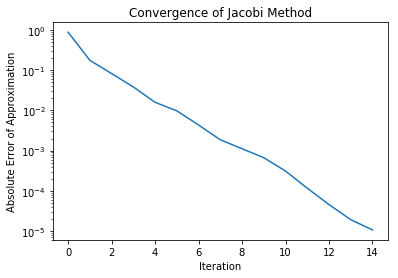

In [3]:
def jacobi_method_plt(A, b, tol, maxiters, plot=False):
    D = np.diag(A)
    U = np.triu(A)
    np.fill_diagonal(U, 0)
    L = np.tril(A)
    np.fill_diagonal(L, 0)
    
    if plot:
        errs = np.zeros(int(maxiters))
    
    iters = 0
    x = np.zeros(A.shape[0])
    while iters < maxiters:
        x_n = x + ((b - np.dot(A, x)) / D)
        err = max(abs(x_n - x))
        if plot:
            errs[iters] = err
        if err < tol:
            break
        x = x_n
        iters += 1
        
    if plot:
        xvals = np.arange(0, iters)
        plt.semilogy(xvals, errs[:iters])
        plt.title("Convergence of Jacobi Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show()
        
    return x
n = 20
b = np.random.random(n)
A = diag_dom(n)
x = jacobi_method_plt(A, b, 1e-5, 1e6, True)

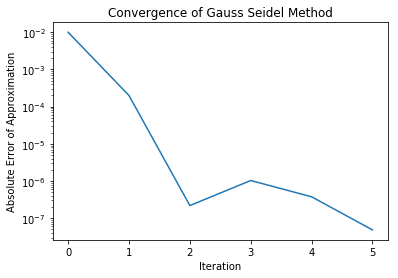

[ 0.68451141  0.8716826   0.87344518 ...,  0.71732142  0.08758843
  0.80178893]
[ 0.68451154  0.87168392  0.87344535 ...,  0.71732142  0.08758843
  0.80178893]


In [4]:
def gauss_seidel_method(A, b, tol, maxiters, plot=False):
    D = np.diag(A)
    x = np.zeros(A.shape[0])
    
    if plot:
        errs = np.zeros(maxiters)
    
    iters = 0
    while iters < maxiters:
        x0 = np.copy(x)
        for i in range(A.shape[0]):
            x0 = np.copy(x)
            Aix = A[i,:].T @ x0
            x[i] = x0[i] + ((b[i] - Aix) / D[i])
        err = np.amax(np.absolute(x - x0))

        if plot:
            errs[iters] = err
        if err < tol:
            break
        iters += 1
    
    if plot:
        xvals = np.arange(0, iters)
        plt.semilogy(xvals, errs[:iters])
        plt.title("Convergence of Gauss Seidel Method")
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show() 


    return x


n = 2000
b = np.random.random(n)
A = diag_dom(n)
x = gauss_seidel_method(A, b, 1e-8, 1000, True)

print(A @ x)
print(b)

In [5]:
def gauss_seidel_sparse(A, b, tol, maxiters):
    D = sparse.csr_matrix.diagonal(A)
    x = np.zeros(A.shape[0])
    
    iters = 0
    while iters < maxiters:
        x0 = np.copy(x)
        for i in range(A.shape[0]):
            x0 = np.copy(x)
            rowstart = A.indptr[i]
            rowend = A.indptr[i + 1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] = x0[i] + ((b[i] - Aix) / D[i])
        err = np.amax(np.absolute(x - x0))
        if err < tol:
            break
    
    return x

n = 10
b = np.random.random(n)
A = sparse.csr_matrix(diag_dom(n))
x = gauss_seidel_sparse(A, b, 1e-6, 1000)

print(A @ x)
print(b)

[ 0.49526563  0.0487045   0.81222923  0.31849928  0.91762828  0.20348543
  0.39755427  0.59378976  0.01448878  0.02260054]
[ 0.66627898  0.30522454  0.81222923  0.31849928  0.91762828  0.20348543
  0.39755427  0.59378976  0.01448878  0.02260054]


In [6]:
def sor_method(A, b, omega, tol, maxiters):
    D = sparse.csr_matrix.diagonal(A)
    x = np.zeros(A.shape[0])
    
    iters = 0
    while iters < maxiters:
        x0 = np.copy(x)
        for i in range(A.shape[0]):
            x0 = np.copy(x)
            rowstart = A.indptr[i]
            rowend = A.indptr[i + 1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            x[i] = x0[i] + (omega * (b[i] - Aix) / D[i])
        err = np.amax(np.absolute(x - x0))
        if err < tol:
            break
        iters += 1
    
    return x, iters

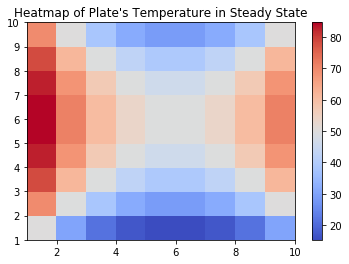

((array([ 49.99753998,  30.35712266,  21.44053349,  17.11890029,
          15.30087441,  15.30117113,  17.1197188 ,  21.44166819,
          30.35826103,  49.99830442,  69.63381828,  49.99165998,
          38.28768034,  31.73593859,  28.78519506,  28.7857414 ,
          31.73744568,  38.28976962,  49.99375601,  69.63522582,
          78.547316  ,  61.68994749,  49.98499662,  42.75463539,
          39.32090133,  39.32163411,  42.75665679,  49.98779887,
          61.6927588 ,  78.54920387,  82.86706756,  68.23822465,
          57.21071095,  49.97998991,  46.42543853,  46.42628479,
          49.98232435,  57.21394717,  68.24147133,  82.86924779,
          84.68447492,  71.18782933,  60.64291752,  53.53277726,
          49.978187  ,  49.97907057,  53.5352146 ,  60.6462964 ,
          71.19121912,  84.68675125,  84.68477165,  71.18837567,
          60.64365031,  53.53362353,  49.97907058,  49.97991835,
          53.53596215,  60.64689232,  71.19162816,  84.68695577,
          82.86788608,  6

In [7]:
def iterprob6(n, omega, tol = 1e-8, maxiters = 100, plot = False):
    B = sparse.diags(np.ones(n)*-4) + sparse.diags(np.ones(n-1), -1) + sparse.diags(np.ones(n-1), 1)
    diags = []
    for i in range(n):
        diags.append(B)
    A = sparse.block_diag(diags)
    A = A + sparse.diags(np.ones(n**2 - n), n) + sparse.diags(np.ones(n**2 - n), -(n))
    b = np.zeros(n)
    b[0] = -100
    b[n-1] = -100
    b = np.tile(b, n)
    u = sor_method(A, b, omega, tol, maxiters) 
    
    if plot == False:
        return u, u[1] 
    
    if plot == True:
        umat = np.reshape(u[0],(n,n))
        X = np.arange(1, n+1, 1) 
        Y = np.arange(1, n+1, 1)
        xx, yy = np.meshgrid(X,Y)
        plt.pcolormesh(xx, yy, umat, cmap = "coolwarm") #if this doesn't work, change xx and yy to X and Y
        plt.title("Heatmap of Plate's Temperature in Steady State")
        plt.colorbar()
        plt.show()
        return u, u[1]
    
n = 10
omega = 1
iterprob6(n, omega, plot=True)

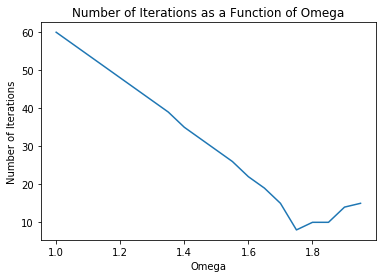

Minimizing index: 1.75


In [8]:
def iterprob7():
    omegavec = np.arange(1, 2, 0.05)
    n = 20
    itervec = np.zeros((len(omegavec),1))
    for i in range(len(omegavec)):
        itervec[i] = iterprob6(n, omegavec[i], tol = 1e-2, maxiters = 1000, plot = False)[1]
    plt.plot(omegavec, itervec)
    plt.xlabel("Omega")
    plt.ylabel("Number of Iterations")
    plt.title("Number of Iterations as a Function of Omega")
    plt.show()
    
    minindex = np.argmin(itervec)
    return omegavec[minindex]

minindex = iterprob7()
print("Minimizing index:", minindex)